## This Notebook Solve Simple Binary Classification Task

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Airline_Delay_Cause.csv")

In [ ]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
# statistical information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [ ]:
# drop categorical variable
data = data.drop(["carrier", "carrier_name", "airport", "airport_name"],axis=1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
# dropna
data.dropna(inplace=True)

In [ ]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317268 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317268 non-null  int64  
 1   month                317268 non-null  int64  
 2   arr_flights          317268 non-null  float64
 3   arr_del15            317268 non-null  float64
 4   carrier_ct           317268 non-null  float64
 5   weather_ct           317268 non-null  float64
 6   nas_ct               317268 non-null  float64
 7   security_ct          317268 non-null  float64
 8   late_aircraft_ct     317268 non-null  float64
 9   arr_cancelled        317268 non-null  float64
 10  arr_diverted         317268 non-null  float64
 11  arr_delay            317268 non-null  float64
 12  carrier_delay        317268 non-null  float64
 13  weather_delay        317268 non-null  float64
 14  nas_delay            317268 non-null  float64
 15  security_delay       3

In [ ]:
data["weather_delay"].min(), data["weather_delay"].max()

(0.0, 57707.0)

In [ ]:
data["WDCase"] = data["weather_delay"].apply(lambda x : 1 if x > 100 else 0)

In [ ]:
data["WDCase"].value_counts()

,count
WDCase,
0,215116
1,102152


In [ ]:
x = data.drop("WDCase", axis=1)
y = data["WDCase"]

In [ ]:
x

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [ ]:
y

,WDCase
0,0
1,0
2,0
3,0
4,0
...,...
318012,1
318013,1
318014,0
318015,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (253814, 17)
x_test shape :  (63454, 17)
y_train shape :  (253814,)
y_test shape :  (63454,)


In [ ]:
import tensorflow as tf
import keras

In [ ]:
KerasModel = keras.models.Sequential([
             keras.layers.Dense(8, activation = "tanh"),
            #  keras.layers.Dropout(0.1),
             keras.layers.Dense(128, activation = "sigmoid"),
            #  keras.layers.Dropout(0.3),
             keras.layers.Dense(64, activation = "tanh"),
            #  keras.layers.Dropout(0.2),
             keras.layers.Dense(1, activation = "sigmoid")
             ])

In [ ]:
Optimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="AdamW",
)

In [ ]:
KerasModel.compile(optimizer=Optimizer, loss="binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = KerasModel.fit(
          x_train, y_train,
          validation_data = (x_test, y_test),
          epochs = 100,
          batch_size = 128, # 1
          verbose = 1,
          callbacks = [tf.keras.callbacks.EarlyStopping(
              patience = 5,
              monitor = "val_accuracy" ,#"val_loss",
              restore_best_weights = True
          )]
        )

Epoch 1/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8424 - loss: 0.3699 - val_accuracy: 0.9711 - val_loss: 0.0833
Epoch 2/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0758 - val_accuracy: 0.9895 - val_loss: 0.0421
Epoch 3/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9754 - loss: 0.0816 - val_accuracy: 0.9939 - val_loss: 0.0333
Epoch 4/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9842 - loss: 0.0638 - val_accuracy: 0.9869 - val_loss: 0.0604
Epoch 5/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0654 - val_accuracy: 0.9889 - val_loss: 0.0417
Epoch 6/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9888 - loss: 0.0485 - val_accuracy: 0.9839 - val_loss: 0.0658
Epoch 7/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9874 - loss: 0.0520 - val_accuracy: 0.9910 - val_loss: 0.0425
Epoch 8/100
1983/1983 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9847 - l

In [ ]:
print(KerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,853 (112.71 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,236 (75.14 KB)

None


In [ ]:
KerasModel.save("KerasModel.keras")

In [ ]:
UploadedModel = keras.models.load_model("KerasModel.keras")

In [ ]:
y_pred = KerasModel.predict(x_test)

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
y_pred[: 10]

array([[4.2494875e-04],
       [1.5171336e-03],
       [3.5959254e-03],
       [4.2494875e-04],
       [9.8887372e-01],
       [4.2494875e-04],
       [1.5171336e-03],
       [9.9327326e-01],
       [4.2494875e-04],
       [9.9502486e-01]], dtype=float32)

In [ ]:
y_test[: 10]

,WDCase
28698,0
104493,0
192335,0
153052,0
96802,1
36438,0
293846,0
156314,1
65475,0
163154,1


In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(x_test, y_test)
print("Model Loss : ", ModelLoss)
print("Model Accuracy : ", ModelAccuracy)

1983/1983 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9942 - loss: 0.0314
Model Loss :  0.03334537148475647
Model Accuracy :  0.9938696026802063


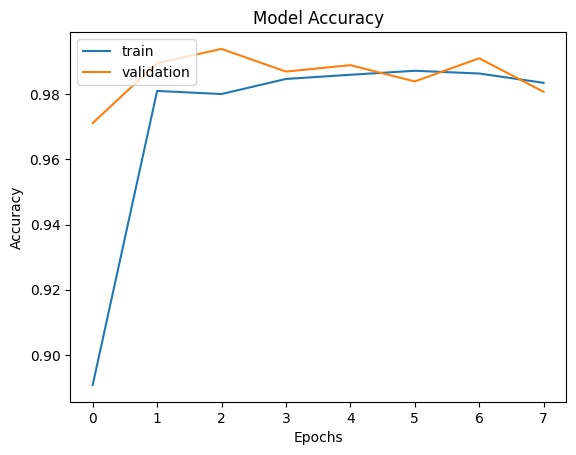

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

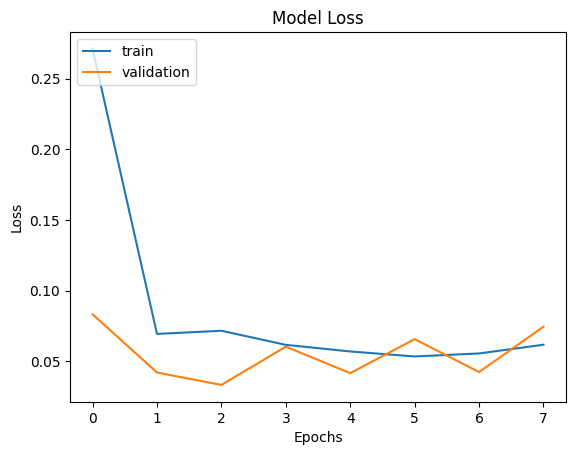

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [ ]:
len(y_test) , len(y_pred)

(63454, 63454)

In [ ]:
y_pred = np.round(y_pred)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test

,WDCase
28698,0
104493,0
192335,0
153052,0
96802,1
...,...
294515,0
184261,0
29240,0
183023,0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is \n",cm)

Confusion Matrix is 
 [[42655   227]
 [  162 20410]]


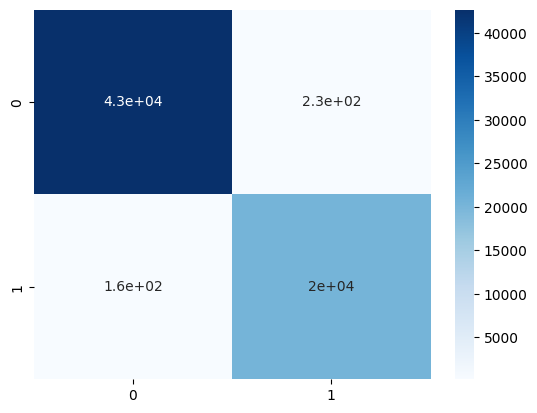

In [ ]:
sns.heatmap(cm, annot = True, cmap = "Blues");

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     42882
           1       0.99      0.99      0.99     20572

    accuracy                           0.99     63454
   macro avg       0.99      0.99      0.99     63454
weighted avg       0.99      0.99      0.99     63454

